In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv1D, Dense, Embedding,GlobalMaxPooling1D, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import classification_report, confusion_matrix



In [12]:
df = pd.read_csv('cleaned-data.csv')

In [13]:
indexNames = []
for index, row in df.iterrows():
    if len(row.Genres.split("; "))>1:
        indexNames.append(index)
df = df.drop(indexNames)

In [14]:
x = np.array(df['Lyric']) #"text"
y = np.array(df['Genres'])

{'Dance', 'Blues', 'New Wave', 'Tecnopop', 'Punk Rock', 'Pop', 'Rock', 'Country', 'Gospel/Religioso', 'Folk', 'R&B', 'Rock Alternativo', 'Romântico', 'Rockabilly', 'Hip Hop', 'Pop/Rock', 'Electronica', 'Jazz', 'Progressivo', 'Pós-Punk', 'Reggae', 'Hardcore', 'Black Music', 'Trilha Sonora', 'Gótico', 'Hard Rock', 'Pop/Punk', 'Soul Music', 'Heavy Metal', 'Rap', 'Soft Rock', 'Indie'}
32


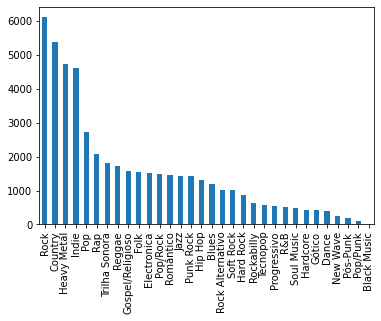

In [22]:
df['Genres'].value_counts().plot.bar()
print(set(df["Genres"]))
genres = set(df["Genres"])
loss_weights = len(set(df["Genres"]))
print(loss_weights)

In [16]:
# tokenizer to transform text into tokens
tokenizer = tf.keras.preprocessing.text.Tokenizer(
    num_words=200000,
    filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
    lower=True, split=' ', char_level=False, oov_token=None,
    #document_count=0, **kwargs
)

# Updates internal vocabulary based on a list of texts.
tokenizer.fit_on_texts(x)

#Transforms each text in x to a sequence of integers.
x = tokenizer.texts_to_sequences(x)

#Pads sequences to the same length. In this case, with maxlen of 100 integers
x = pad_sequences(x, maxlen = 250)

# tokenizer to transform text into tokens
tokenizer = tf.keras.preprocessing.text.Tokenizer(
    num_words=1000,
    filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
    lower=True, split='; ', char_level=False, oov_token=None,
    #document_count=0, **kwargs
)

# Updates internal vocabulary based on a list of texts.
tokenizer.fit_on_texts(y)

#Transforms each text in x to a sequence of integers.
y = tokenizer.texts_to_sequences(y)

y = np.array([elem[0]-1 for elem in y])

[ 3 22 21 ...  0  0 13]


In [21]:
for i in range(len(y)):
    if df.iloc[i,1] not in genres:
        print(i)
        print(y[i])
        print(df.iloc[i,1])

In [17]:
#CNN Model
def CNN_Model(loss_weights, vocab_size=200000, features=50, input_length=250, learning_rate=0.001, kernel_size=8):
    model = Sequential()
    # Embedding layer
    model.add(Embedding(vocab_size,features,input_length=input_length))
    # Convolutional Layer
    model.add(Conv1D(128, kernel_size, strides=1, activation='relu'))
    # Pooling Layer
    model.add(GlobalMaxPooling1D())

    model.add(Dense(128, activation='relu'))
    model.add(Dropout(.25))

    # Output Layer
    model.add(Dense(loss_weights, activation='sigmoid'))
    model.compile(loss=keras.losses.sparse_categorical_crossentropy, optimizer=keras.optimizers.Adam(learning_rate=learning_rate), metrics=['accuracy'])
    return model

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [9]:
model = CNN_Model(loss_weights)
res = model.fit(x_train,np.array(y_train),validation_data=(x_test,np.array(y_test)),epochs=2,batch_size=64)

2022-07-03 18:20:26.183132: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-07-03 18:20:26.183199: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (pedrod33): /proc/driver/nvidia/version does not exist
2022-07-03 18:20:26.184892: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/2
189/620 [========>.....................] - ETA: 1:53 - loss: 3.0334 - accuracy: 0.1262

2022-07-03 18:21:16.837245: W tensorflow/core/framework/op_kernel.cc:1745] OP_REQUIRES failed at sparse_xent_op.cc:103 : INVALID_ARGUMENT: Received a label value of 32 which is outside the valid range of [0, 32).  Label values: 28 11 15 0 2 2 27 11 10 20 0 10 2 8 4 6 1 1 2 12 0 3 12 11 17 3 2 3 3 6 0 1 32 2 13 18 0 22 2 20 0 4 18 17 4 19 6 3 4 0 12 3 0 1 8 3 3 2 12 7 4 11 3 18


InvalidArgumentError: Graph execution error:

Detected at node 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits' defined at (most recent call last):
    File "/usr/lib/python3.8/runpy.py", line 194, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/usr/lib/python3.8/runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "/home/pedrod33/.local/lib/python3.8/site-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/home/pedrod33/.local/lib/python3.8/site-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/home/pedrod33/.local/lib/python3.8/site-packages/ipykernel/kernelapp.py", line 677, in start
      self.io_loop.start()
    File "/home/pedrod33/.local/lib/python3.8/site-packages/tornado/platform/asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.8/asyncio/base_events.py", line 570, in run_forever
      self._run_once()
    File "/usr/lib/python3.8/asyncio/base_events.py", line 1859, in _run_once
      handle._run()
    File "/usr/lib/python3.8/asyncio/events.py", line 81, in _run
      self._context.run(self._callback, *self._args)
    File "/home/pedrod33/.local/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 473, in dispatch_queue
      await self.process_one()
    File "/home/pedrod33/.local/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 462, in process_one
      await dispatch(*args)
    File "/home/pedrod33/.local/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 369, in dispatch_shell
      await result
    File "/home/pedrod33/.local/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 664, in execute_request
      reply_content = await reply_content
    File "/home/pedrod33/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py", line 355, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "/home/pedrod33/.local/lib/python3.8/site-packages/ipykernel/zmqshell.py", line 532, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/home/pedrod33/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 2854, in run_cell
      result = self._run_cell(
    File "/home/pedrod33/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 2900, in _run_cell
      return runner(coro)
    File "/home/pedrod33/.local/lib/python3.8/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/home/pedrod33/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3098, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/home/pedrod33/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3301, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/home/pedrod33/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3361, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/tmp/ipykernel_6674/989338951.py", line 2, in <cell line: 2>
      res = model.fit(x_train,np.array(y_train),validation_data=(x_test,np.array(y_test)),epochs=2,batch_size=64)
    File "/home/pedrod33/.local/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/home/pedrod33/.local/lib/python3.8/site-packages/keras/engine/training.py", line 1384, in fit
      tmp_logs = self.train_function(iterator)
    File "/home/pedrod33/.local/lib/python3.8/site-packages/keras/engine/training.py", line 1021, in train_function
      return step_function(self, iterator)
    File "/home/pedrod33/.local/lib/python3.8/site-packages/keras/engine/training.py", line 1010, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/pedrod33/.local/lib/python3.8/site-packages/keras/engine/training.py", line 1000, in run_step
      outputs = model.train_step(data)
    File "/home/pedrod33/.local/lib/python3.8/site-packages/keras/engine/training.py", line 860, in train_step
      loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/home/pedrod33/.local/lib/python3.8/site-packages/keras/engine/training.py", line 918, in compute_loss
      return self.compiled_loss(
    File "/home/pedrod33/.local/lib/python3.8/site-packages/keras/engine/compile_utils.py", line 201, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/home/pedrod33/.local/lib/python3.8/site-packages/keras/losses.py", line 141, in __call__
      losses = call_fn(y_true, y_pred)
    File "/home/pedrod33/.local/lib/python3.8/site-packages/keras/losses.py", line 245, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/home/pedrod33/.local/lib/python3.8/site-packages/keras/losses.py", line 1862, in sparse_categorical_crossentropy
      return backend.sparse_categorical_crossentropy(
    File "/home/pedrod33/.local/lib/python3.8/site-packages/keras/backend.py", line 5202, in sparse_categorical_crossentropy
      res = tf.nn.sparse_softmax_cross_entropy_with_logits(
Node: 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits'
Received a label value of 32 which is outside the valid range of [0, 32).  Label values: 28 11 15 0 2 2 27 11 10 20 0 10 2 8 4 6 1 1 2 12 0 3 12 11 17 3 2 3 3 6 0 1 32 2 13 18 0 22 2 20 0 4 18 17 4 19 6 3 4 0 12 3 0 1 8 3 3 2 12 7 4 11 3 18
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_train_function_819]

In [ ]:
def plot_accuracy_comparison(accs, title, legend):
    epochs = len(accs[0])
    plt.figure(figsize = (10,5))
    for acc in accs:
        plt.plot(range(1, epochs+1), acc)

    plt.xticks(range(1, epochs+1))
    plt.title(title)
    plt.legend(legend)
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.show()


In [ ]:
def plot_loss_comparison(losses, title, legend):
    epochs = len(losses[0])
    plt.figure(figsize = (10,5))
    for loss in losses:
        plt.plot(range(1, epochs+1), loss)

    plt.xticks(range(1, epochs+1))
    plt.title(title)
    plt.legend(legend)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.show()

In [ ]:
def plot_confusion_matrix(y_test, y_pred):
    plt.matshow(confusion_matrix(y_test, y_pred))
    plt.ylabel("Predicted Category", fontsize=14)
    plt.title("Category", fontsize=14)
    plt.show()

In [ ]:
plot_accuracy_comparison([res.history["accuracy"], res.history["val_accuracy"]],
                        "Training/Validation Accuracy Comparison",
                        ["Training Accuracy", "Validation Accuracy"])


In [ ]:
plot_accuracy_comparison([res.history["loss"], res.history["val_loss"]],
                        "Training/Validation Loss Comparison",
                        ["Training Accuracy", "Validation Accuracy"])

In [ ]:
print(np.argmax(model.predict(x_test), axis=-1))
#print(y_test)
plot_confusion_matrix(y_test,np.argmax(model.predict(x_test), axis=-1))